In [1]:
## Standard libraries
from PIL import Image

## PyTorch
import torch
## Torchvision
from torchvision import transforms

from groupconv.groups import *


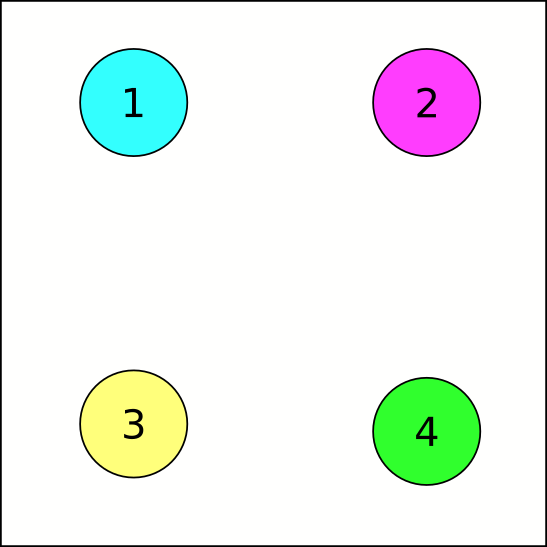

In [2]:
img = Image.open("images/bitmap.png")

img_tensor = transforms.ToTensor()(img)

img

In [3]:
# This creates a grid of the pixel locations in our image
img_grid_R2 = torch.stack(torch.meshgrid(
    torch.linspace(-1, 1, img_tensor.shape[-1]),
    torch.linspace(-1, 1, img_tensor.shape[-2]),
))

# [2, 512, 512] since our image is 2 dimensional and has a width and height of 
# 512 pixels
img_grid_R2.shape

/home/giorgio/.local/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([2, 547, 547])

In [4]:
# let's create the group of 90 degree clockwise rotations and the four reflections
d4 = DihedralGroup(4)
rot0, rot1, rot2, rot3, ref1, ref2, ref3, ref4 = d4.elements()

/home/giorgio/Desktop/GroupEquivariantConvNetworks/DLAI_D4EQConvNet/groupconv/groups.py:203: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  return torch.range(start=0,end=self.order-1,dtype=torch.int32)


In [5]:
# What happens when we take the product of two reflection (left to right) and rotation to left?
g = d4.product(rot1,ref1)

# Transform the image grid we just created with the matrix representation of 
# this group element. Note that we implemented this batchwise, so we add a dim.
transformed_grid = d4.left_action_on_R2(d4.inverse(g).unsqueeze(0), img_grid_R2)

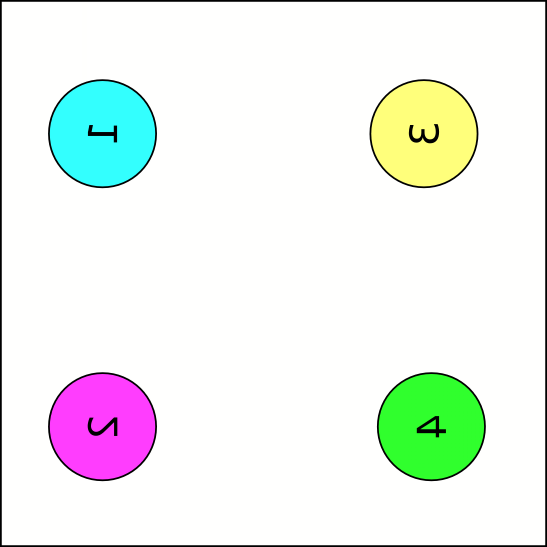

In [6]:
# This function samples an input tensor based on a grid using interpolation. 
# It is implemented for batchwise operations so we add a dimension to our and input image.
transformed_img = torch.nn.functional.grid_sample(img_tensor.unsqueeze(0), transformed_grid, align_corners=True, mode="bilinear")

# if we turn this back into a PIL image we can see the result of our transformation!
transforms.ToPILImage()(transformed_img[0])